# DWS 101 - Exercise 4 - Part B

### Μεταφόρτωση Βιβλιοθηκών

Let’s start by importing our libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# για το γράφημα
import plotly.express as px
import plotly.graph_objects as go
# train and test
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

And define our color visualization settings:

In [2]:
px.defaults.template = "plotly_white"
color_palette = ['#26C6DA', '#7a0e00', '#FF7043', '#2E78D2']

### Ερώτημα 1

*Φορτώστε το σύνολο δεδομένων wine-full.csv. Θεωρείτε πως το σκορ
(quality) είναι ισορροπημένο (balanced); Αιτιολογήστε,
συμπεριλαμβάνοντας και το αντίστοιχο plot.*

In [3]:
df_raw = pd.read_csv("data/wine-full.csv")
df_raw.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Επομένως τα types των επιμέρους στηλών είναι σωστά.

Από τα παραπάνω βλέπω πως η μεταβλητή quality είναι διακριτή, δηλαδή το
πεδίο τιμών της είναι πεπερασμένο και μπορεί να πάρει μόνο συγκεκριμένες
τιμές ακεραίων μεταξύ 3 και 9.

In [6]:
quality_value_counts = df_raw['quality'].value_counts().sort_index()

fig = px.bar(
    quality_value_counts,
    color_discrete_sequence=[color_palette[0]],
    title="Quality variable distribution"
    )

fig.update_layout(
    autosize=False,
    width=500,
    height=400
)

fig.update_xaxes(
    tickmode='linear'
)

fig.show()
print(quality_value_counts)

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


Αναφερόμενοι σε ισορροπημένη κατανομή, εννοούμε εάν οι τιμές της
διακριτής μεταβλητής εμφανίζονται με παρόμοια συχνότητα στο δείγμα μας.

Το πρώτο συμπέρασμα από το γράφημα είναι πως:

α) η μεταβλητή δεν είναι ισορροπημένη, με την έννοια πως δεν παρουσιάζει
την ίδια συχνότητα εμφάνισης για τις διακριτές τιμές της. Η τιμή 6 έχει
την μεγαλύτερη συχνότητα εμφάνισης με n = 2836, ενώ η τιμή 9 τη
μικρότερη, με n=5.

β) δεν έχει κανονική κατανομή, αλλά παρουσιάζει ελαφριά δεξιά λοξότητα.

### Ερώτημα 2

*Συχνά δημιουργείται η ερώτηση: Το κόκκινο η το λευκό κρασί είναι
ποιοτικά καλύτερο; Εφαρμόστε κατάλληλη μεθοδολογία και plots, ώστε να
αιτιολογήσετε την απάντηση σας.*

Από το documentation της μεθόδου `value_counts` βλέπω πως έχω την
επιλογή να θέσω την παράμετρο `normalize=True`, για να πάρω τις σχετικές
συχνότητες των τιμών της quality για τα δύο types (red και white).

Οπότε, για να απαντήσω στην ερώτηση, θα κάνω τα εξής:

-   Group by κατά type και υπολογισμός του value counts για την στήλη
    quality

-   Γράφημα συχνότητας για τις τιμές της στήλης quality, διαχωρισμένες
    με βάση τις δύο τιμές της στήλης ‘type’, δηλαδή ‘red’ και ‘white’.

In [7]:
freq_data = (
    df_raw.groupby('type')['quality']
    .value_counts(normalize=True)
    .reset_index(name='Relative Frequency')
)

fig = px.bar(
    freq_data,
    x="quality",
    y="Relative Frequency",
    color="type",
    color_discrete_sequence=color_palette,
    title="Quality variable distribution per type of wine",
    barmode="group"
)

fig.update_layout(
    autosize=False,
    width=500,
    height=400
)

fig.update_xaxes(
    tickmode='linear'
)

fig.show()

### Ερώτημα 3

*Το γλυκό κρασί έχει μεγαλύτερη ποιότητα από ότι το ξηρό; Αιτιολογήστε
την απάντηση σας, λαμβάνοντας υπόψη την ποσότητα υπολειπόμενων
σακχάρων.*

Από την βιβλιογραφία βρίσκω πως οι οίνοι χωρίζονται σε τέσσερις
κατηγορίες με βάση την περιεκτικότητά τους σε σάκχαρα, με βάση τους
κανονισμούς της Ε.Ε.:

-   Ξηρά: περιεκτικότητα σε σάκχαρα έως 4 γρ. ανά λίτρο.
-   Ημίξηρα: περιεκτικότητα σε σάκχαρα από 4 μέχρι 12 γρ. ανά λίτρο.
-   Ημίγλυκα: περιεκτικότητα σε σάκχαρα 12 μέχρι 45 γρ. ανά λίτρο.
-   Γλυκά: περιεκτικότητα σε σάκχαρα πάνω από 45 γρ.ανά λίτρο.

Οπότε θα δημιουργήσω μια νέα στήλη `sweetness` στον πίνακά μου, με την
κατηγοριοποίηση κάθε data point βάση των παραπάνω:

In [8]:
# χρησιμοποιώ το max() για να πάρω την μέγιστη τιμή
bins = [0, 4, 12, 45, df_raw['residual sugar'].max()]
labels = ['Dry', 'Semi-dry', 'Semi-sweet', 'Sweet']

df_raw['sweetness'] = pd.cut(
    df_raw['residual sugar'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

quality_value_counts = df_raw['sweetness'].value_counts().sort_index()
print(quality_value_counts)

sweetness
Dry           3569
Semi-dry      2092
Semi-sweet     833
Sweet            1
Name: count, dtype: int64


Παρατηρώ όμως πως έχω ένα μόνο γλυκό κρασί στο dataset:

In [9]:
df_raw[df_raw['residual sugar'] > 45]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,sweetness
2781,white,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,Sweet


Οπότε δεν μπορώ να αποφανθώ βάση του συγκεκριμένου δείγματος για το αν
το γλυκό κρασί έχει μεγαλύτερη ποιότητα από ότι το ξηρό, διότι δεν
επαρκούν οι μετρήσεις για να βγάλω συμπεράσματα για τον πληθυσμό, βάση
της στατιστικής συμπερασματολογίας.

Κάνω παρόλα αυτά ένα plot:

In [10]:
freq_data = (
    df_raw.groupby('sweetness')['quality']
    .value_counts(normalize=True)
    .reset_index(name='Relative Frequency')
)

fig = px.bar(
    freq_data,
    x="quality",
    y="Relative Frequency",
    color="sweetness",
    color_discrete_sequence=color_palette,
    title="Quality variable distribution per sweetness of wine",
    barmode="group"
)

fig.update_layout(
    autosize=False,
    width=500,
    height=400
)

# για να φαίνονται όλες οι τιμές
fig.update_xaxes(
    tickmode='linear'
)

fig.show()

/var/folders/6b/f7ny0f697v9_3ymryd5sqsmr0000gn/T/ipykernel_8202/2595942097.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Ερώτημα 4

*Δημιουργήστε numpy arrays x, y όπου τα inputs είναι όλες οι μεταβλητές
εκτός του quality, ενώ y οι μεταβλητή quality. Χωρίστε το σύνολο
δεδομένων σε train-test με ποσοστά 90-10 αντίστοιχα. Χρησιμοποιείστε
random_state=0.*

Δεν θα κρατήσω τη στήλη `sweetness` στους υπολογισμούς μου, γιατί είναι
ουσιαστικά απόλυτα συσχετισμένη με τη στήλη `residual sugar` και θα έχω
πολυσυγγραμικότητα.

Επιπλέον, τα δένδρα απόφασης δεν μπορούν να λειτουργήσουν με κατηγορικές
μεταβλητές, επομένως θα μετατρέψω τον τύπο του κρασιού με one-hot
encoding:

In [11]:
df_raw = pd.get_dummies(df_raw, columns=['type'], drop_first=True)

df_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,sweetness,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Semi-sweet,True
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Dry,True
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Semi-dry,True
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Semi-dry,True
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Semi-dry,True


In [12]:
# αφαιρώ τις δύο στήλες
# χρησιμοποιώ to_numpy() για να τα κάνω arrays
X = df_raw.drop(columns=['quality', 'sweetness']).to_numpy()

y = df_raw['quality'].to_numpy()

# χωρίζω σε train και test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=0
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5847, 12), (650, 12), (5847,), (650,))

Επομένως έχω 12 χαρακτηριστικά και μια μεταβλητή - στόχο.

### Ερώτημα 5

*Εκπαιδεύστε DecisionTreeRegressor (random_state=0) στο training set και
υπολογίστε το σφάλμα με τη μετρική MAE στο test set.*

In [13]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)

# οι προβλεπόμενες τιμές
y_pred = model.predict(X_test)

# το μέσο απόλυτο σφάλμα
mae = mean_absolute_error(y_test, y_pred)
print(f"Το μέσο απόλυτο σφάλμα στο test set είναι {mae:.4f}")

Το μέσο απόλυτο σφάλμα στο test set είναι 0.4585


Στην πράξη αυτό το αποτέλεσμα σημαίνει πως «Κατά την πρόβλεψη της
ποιότητας του κρασιού, το μοντέλο έχει μια απόκλιση 0.46 μονάδων. Άρα
εάν παραδείγματος χάριν ένα κρασί έχει βαθμολογία 6, η πρόβλεψη θα είναι
συνήθως μεταξύ 5.5 και 6.5».

### Ερώτημα 6

*Θέλουμε να υπολογίσουμε αν το μοντέλο του ερωτήματος 4 είναι αξιόπιστο.
Επαναλάβετε τη διαδικασία 3-4, χρησιμοποιώντας 10 διαφορετικά seed
(0-9). Στη συνέχεια, υπολογίσετε το μέσο όρο και την τυπική απόκλιση για
τη μετρική MAE. Πως μπορούμε να αξιοποιήσουμε αυτές τις τιμές ώστε να
είμαστε πιο βέβαιοι για το αναμενόμενο σφάλμα του μοντέλου;*

Η τυπική απόκλιση είναι η ρίζα της διακύμανσης και ίση με
`SD = sqrt(Var(X)) = sqrt(E[(X−μX)2])`

Για να απαντήσω στο ερώτημα, θα τρέξω ένα for loop:

In [14]:
# για την αποθήκευση των αποτελεσμάτων
mae_results = []

for seed in range(10):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.10, random_state=seed
    )

    model = DecisionTreeRegressor(random_state=seed)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_results.append(mae)

mae_mean = np.mean(mae_results)
mae_SD = np.std(mae_results)

print(f"Μέσο Απόλυτο Σφάλμα για τα seeds 0–9: {mae_results}")
print(f"Μέσος Όρος του Μέσου Απόλυτου Σφάλματος: {round(mae_mean, 2)}")
print(f"Η τυπική απόκλιση του Μέσου Απόλυτου Σφάλματος: {round(mae_SD, 2)}")

Μέσο Απόλυτο Σφάλμα για τα seeds 0–9: [0.4584615384615385, 0.5123076923076924, 0.4430769230769231, 0.4646153846153846, 0.4876923076923077, 0.4307692307692308, 0.47692307692307695, 0.4676923076923077, 0.44461538461538463, 0.4815384615384615]
Μέσος Όρος του Μέσου Απόλυτου Σφάλματος: 0.47
Η τυπική απόκλιση του Μέσου Απόλυτου Σφάλματος: 0.02


Σύμφωνα με τα αποτελέσματα, το Δέντρο Αποφάσεων προβλέπει κατά μέσο όρο
την ποιότητα του κρασιού με απόκλιση \[-0.47, +0.47\] από την πραγματική
τιμή του βαθμού ποιότητας. Η χαμηλή τυπική απόκλιση για τα διαφορετικά
seeds καταδεικνύει πως το μοντέλο είναι σταθερό και η απόδοσή του δεν
αλλάζει πολύ, άρα είναι αξιόπιστο.

### Ερώτημα 7

*Χωρίστε το σύνολο train set σε train-validation με ποσοστά 80-20%
αντίστοιχα, χρησιμοποιώντας (random_state=0). Θα πρέπει να έχετε 3
σύνολα δεδομένων (train-validation-test) με ποσοστά 70-20-10 του
συνολικού dataset. Θέλουμε να κάνουμε fine-tuning (εύρεση
υπερπαραμέτρων) ώστε να βελτιωθεί η ακρίβεια του δέντρου (ερώτημα 3).
Δοκιμάστε 15 διαφορετικούς συνδυασμούς με παραμέτρους της επιλογής σας,
διατηρώντας πάντα το random_state=0 και υπολογίστε το MAE στο training
και στο validation set για κάθε συνδυασμό.*

Θα χρησιμοποιήσω τα X και y που έχω ήδη υπολογίσει παραπάνω:

In [15]:
# Παίρνω αρχικά το train set
X_train, X_temporary, y_train, y_temporary = train_test_split(
    X, y, test_size=0.30, random_state=0
)

# Και τώρα θα χωρίσω το λοιπό 30% σε 2/3 (validation) και 1/3 (test)
X_val, X_test, y_val, y_test = train_test_split(
    X_temporary, y_temporary, test_size=0.333, random_state=0
)

Θα δοκιμάσω τους παρακάτω συνδυασμούς, σε μια λίστα με keys and values
για να περάσω αυτούσια στον ταξινομητή:

In [16]:
parameter_combinations = [
    {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 1},
    {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 1},
    {'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 1},
    {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2},
    {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 2},
    {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5},
    {'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 3},
    {'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 5},
    {'max_depth': 8, 'min_samples_split': 15, 'min_samples_leaf': 4},
    {'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 2},
]

και τρέχω μια for loop:

In [17]:
# Για τα αποτελέσματά μου
fine_tuning_results = []

# for loop για τους 15 συνδυασμούς
for i, parameters in enumerate(parameter_combinations, 1):
    # train
    model = DecisionTreeRegressor(random_state=0, **parameters)
    model.fit(X_train, y_train)
    
    # predict
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # υπολογισμός MAE
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_validation = mean_absolute_error(y_val, y_val_pred)
    
    fine_tuning_results.append({
        'combination': i,
        **parameters,
        'mae_train': mae_train,
        'mae_val': mae_validation
    })

Θα αποθηκεύσω τα αποτελέσματα σε dataframe:

In [18]:
results_df = pd.DataFrame(fine_tuning_results)
results_df

,combination,max_depth,min_samples_split,min_samples_leaf,mae_train,mae_val
0,1,3,2,1,0.587255,0.587804
1,2,5,2,1,0.536640,0.573692
2,3,10,2,1,0.344027,0.546794
3,4,15,2,1,0.082390,0.493547
4,5,8,2,1,0.446794,0.557066
5,6,5,5,1,0.536640,0.573692
6,7,5,10,1,0.536640,0.573692
7,8,5,20,1,0.536640,0.573692
8,9,10,5,2,0.357301,0.536856
9,10,10,10,2,0.376366,0.532505


Εξετάζοντας τα αποτελέσματα, αυτό το οποίο γενικά θέλω:

-   Αφενός να μην έχω χαμηλό MAE στο training set και υψηλό στο
    validation set,γιατί δείχνει υπερπροσαρμογή (overfitting)

-   Χαμηλό MAE στο validation set, που ακατδεικνύει καλή γενίκευση του
    μοντέλου.

Βάση των αποτελεσμάτων παρατηρώ πως:

-   `max_depth`: Δένδρα μικρού βάθους (από 3 έως 5) οδηγούν σε
    υποπροσαρμογή (underfitting), άρα το μοντέλο δεν μπορεί να μειώσει
    το σφάλμα εκπαίδευσης. Μεγάλα βάθη (από 10 έως 15) οδηγούν σε
    υπερπροσαρμογή.

-   `min_samples_split`: Ορίζοντας μεγαλύτερη τιμή ως προαπαιτούμενο για
    να γίνει διαχωρισμός σε έναν κόμβο (αλλιώς σταματάει ο διαχωρισμός
    και θεωρείται τελικός κόμβος) μειώνεται η υπερπροσαρμογή. Αντίθετα,
    όταν συνεχίζω τους διαχωρισμούς (μικρότερο όριο), έχω κάποια
    υπερπροσαρμογή.

-   `min_samples_leaf`: Εάν ορίζω μεγάλο αριθμό απαιτούμενων δειγμάτων
    μετά τη διάσπαση σε κάθε κλάδο, έχω καλύτερη προσαρμογή, ενω
    μικρότερη τιμή δημιουργεί φύλλα που βασίζονται σε πολύ λίγα σημεία
    δεδομένων και έχω κάποια υπερπροσαρμογή.

### Ερώτημα 8

*Ποιό από τα δύο σύνολα δεδομένα (training ή validation set) είναι
περισσότερο αξιόπιστο για την επιλογή υπερπαραμέτρων; Αιτιολογείστε.*

Το σύνολο δεδομένων training χρησιμοποιείται για την εκπαίδευση του
μοντέλου. Εάν επέλεγα υπερπαραμέτρους βάση αυτού, θα είχα τον κίνδυνο
υπερπροσαρμογής του μοντέλους, δηλαδή να μην μπορεί να κάνει καλή
γενίκευση σε άγνωστα δεδομένα.

Το δείγμα δεδομένων validation χρησιμοποιείται για να αξιολογήσει την
προσαρμογή του μοντέλου στο σύνολο δεδομένων εκπαίδευσης. Το μοντέλο
βλέπει περιστασιακά αυτά τα δεδομένα, και άρα για αυτον τον λόγο - βάση
των αποτελεσμάτων και της εκάστοτε loss function που χρησιμοποιούμε ως
κριτήριο- ενημερώνουμε τις υπερπαραμέτρους του μοντέλου.

### Ερώτημα 9

*Θα δοκιμάσουμε τη μέθοδο cross-validation για την επιλογή παραμέτρων
Χρησιμοποιήστε το σύνολο δεδομένων train-test του ερωτήματος 4. Αυτή τη
φορά όμως, κάντε fine-tuning με τη βοήθεια cross-validation στο σύνολο
train. Για διευκόλυνση, μπορείτε να χρησιμοποιήσετε τη συνάρτηση
GridSearchCV της sklearn. Πιο συγκεκριμένα, αντί να υπάρχει σταθερό
validation set, η sklearn θα χωρίσει το train set K φορές σε K
διαφορετικά σύνολα train-validation και θα υπολογίσει το μέσο σφάλμα.
Χρησιμοποιήστε τη μετρική MAE ως scoring, random_state=0 και ορίστε
cv=10 ώστε να δημιουργηθούν K=10 folds. Μπορείτε να παραλληλοποιήσετε τη
διαδικασία ορίζοντας n_jobs=-1, ώστε να χρησιμοποιήσετε όλους τους
πυρήνες του επεξεργαστή.*

Θα χρησιμοποιήσω κι εδώ τα X και y που έχω ήδη υπολογίσει παραπάνω:

In [19]:
# κάνω split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=0
)

# βάση του parameter_combinations
parameters_grid = {
    'max_depth': [3, 5, 8, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

model = DecisionTreeRegressor(random_state=0)

Από τη βιβλιογραφία, βλέπουμε πως η GridSearchCV χρειάζεται μια
συνάρτηση score, που θα λειτουργεί ως βαθμολογία: όσο μεγαλύτερη, τόσο
καλύτερη η αξιολόγηση του μοντέλου, οπότε για τη ΜΑΕ θα θέσω
`greater_is_better=False`, καθώς θέλω το σφάλμα να είναι μικρό. Η
`make_scorer()` μας επιτρέπει να μετατρέψουμε οποιαδήποτε μετρική σε
scorer συμβατό με το scikit-learn.

In [20]:
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# παράμετροι του μοντέλου
grid_search = GridSearchCV(
    estimator=model,
    param_grid=parameters_grid,
    scoring=mae_scorer,
    cv=10,
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# εκπαιδεύω
grid_search.fit(X_train, y_train)

# θα αποθηκεύσω τα αποτελέσματά μου σε dataframe
cross_validation_df = pd.DataFrame(grid_search.cv_results_)
cross_validation_df.head()

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.021643,0.006806,0.001467,0.000456,3,1,2,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",-0.583685,-0.587331,...,-0.58424,-0.58093,-0.588202,-0.590724,-0.583873,-0.592206,-0.587114,-0.583775,-0.586158,0.003773
1,0.023977,0.011023,0.001922,0.001017,3,1,5,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",-0.583685,-0.587331,...,-0.58424,-0.58093,-0.588202,-0.590724,-0.583873,-0.592206,-0.587114,-0.583775,-0.586158,0.003773
2,0.016455,0.002334,0.001259,0.000278,3,1,10,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",-0.583685,-0.587331,...,-0.58424,-0.58093,-0.588202,-0.590724,-0.583873,-0.592206,-0.587114,-0.583775,-0.586158,0.003773
3,0.015209,0.002501,0.001357,0.000550,3,1,15,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",-0.583685,-0.587331,...,-0.58424,-0.58093,-0.588202,-0.590724,-0.583873,-0.592206,-0.587114,-0.583775,-0.586158,0.003773
4,0.014351,0.001622,0.001160,0.000170,3,1,20,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",-0.583685,-0.587331,...,-0.58424,-0.58093,-0.588202,-0.590724,-0.583873,-0.592206,-0.587114,-0.583775,-0.586158,0.003773


Και από τις μεθόδους της GridSearch μπορώ να δω τις καλύτερες
παραμέτρους και ποιά πήρε το καλύτερο score:

In [21]:
print("Οι καλύτεροι παράμετροι είναι:", grid_search.best_params_)

print(f"Με το καλύτερο Μέσο Απόλυτο Σφάλμα στο training: {-grid_search.best_score_:.4f}")

Οι καλύτεροι παράμετροι είναι: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Με το καλύτερο Μέσο Απόλυτο Σφάλμα στο training: 0.4811


### Ερώτημα 10

*Χρησιμοποιήστε το καλύτερο μοντέλο του ερωτήματος 9 και υπολογίστε τη
μετρική MAE στο test set.*

Οπότε παίρνω αυτές τις παραμέτρους για να υπολογίσω τις προβλέψεις στο
test set:

In [22]:
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Μέσο Απόλυτο Σφάλμα στο τεστ: {mae_test:.4f}")

Μέσο Απόλυτο Σφάλμα στο τεστ: 0.4475


Παρατηρούμε πως συμβαίνει το εξής παράδοξο: βάση των αποτελεσμάτων στο
ερώτημα 7, επιλέγοντας α) χαμηλά όρια για την ποσότητα των δειγμάτων σε
κάθε φύλλο και τα απαιτούμενα δείγματα μετά τη διάσπαση σε κάθε κλάδο
και β) μεγάλο βάθος δένδρου, θα οδηγούμουν σε υπερπροσαρμογή, που όμως
δεν έγινε στην περίπτωσή μας.

*Ποια από τις μεθοδολογίες που ακολουθήθηκαν (6/7/9) είναι περισσότερο
αξιόπιστη; Αιτιολογήστε.*

Στο ερώτημα 6, αλλάζουμε το random seed για να αξιολογήσουμε την
σταθερότητα του μοντέλου με διαφορετικό διαχωρισμό των δεδομένων, αλλά
δεν αλλάζουμε τις υπερπαραμέτρους ούτε διερευνούμε την επίδρασή τους στη
συμπεριφορά του μοντέλου.

Στο ερώτημα 7, αλλάζουμε και διερευνούμε τις υπερπαραμέτρους, τις
αξιολογούμε όμως μόνο σε ένα set δεδομένων, το validation set, οπότε
κατά μια έννοια μπορεί να κάνουμε υπερπροσαρμογή σε αυτό.

Στο ερώτημα 9 χρησιμοποιώ πολλαπλους και διαφορετικούς διαχωρισμούς
ανάμεσα στο training και το validation, για να αντιμετωπίσω τον
προαναφερθέντα κίνδυνο υπερπροσαρμογής. Οι τελικές παράμετροι
επιλέγονται βάση των μέσων όρων των σφαλμάτων για τους προαναφερθέντες
διαχωρισμούς, άρα είναι πιο αξιόπιστες.

### Ερώτημα 11

*Επαναλάβετε την ερώτηση 9, χρησιμοποιώντας πάντα σταθερό max_depth=5.
Εμφανίστε το καλύτερο δέντρο (με τη χρήση της plot tree). Επιπλέον, να
αναφέρετε τους κανόνες που δημιουργήθηκαν (πχ το κρασί έχει υψηλό σκορ
αν περιέχει πολύ ζάχαρη, είναι κόκκινο, κλπ..). Τέλος, να εμφανίσετε
ραβδόγραμμα με τη σημαντικότητα κάθε χαρακτηριστικού, ταξινομώντας τα με
βάση τη σημαντικότητα τους.*

Εφόσον σε αυτές τις επαναλήψεις κρατάω σταθερό το βάθος του του δένδρου,
θα πειραματιστώ αλλάζοντας το κριτήριο διαχωρισμού.

In [23]:
# κάνω split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=0
)

# τα νέα κριτήρια
parameters_grid = {
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'criterion': ['squared_error', 'friedman_mse', 'poisson']
}

model = DecisionTreeRegressor(random_state=0, max_depth=5)

Ορίζω τώρα και τη συνάρτηση score, όμοια με προηγουμένως:

In [24]:
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# παράμετροι του μοντέλου
grid_search = GridSearchCV(
    estimator=model,
    param_grid=parameters_grid,
    scoring=mae_scorer,
    cv=10,
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# εκπαιδεύω
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits
[CV] END criterion=squared_error, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, min_samples_leaf=1, min_samples_split=5; total time=   0.

[CV] END criterion=squared_error, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=squared_error, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=squared_error, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=squared_error, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=squared_error, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=squared_error, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=squared_error, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=squared_error, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=squared_error, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=squared_error, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=squared_error, min_samples_leaf=1, min_

,estimator,DecisionTreeR...andom_state=0)
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,make_scorer(m...hod='predict')
,n_jobs,-1
,refit,True
,cv,10
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,criterion,'poisson'


Αποτελέσματα:

In [25]:
best_model = grid_search.best_estimator_

print("Οι καλύτεροι παράμετροι είναι:", grid_search.best_params_)

print(f"Με το καλύτερο Μέσο Απόλυτο Σφάλμα στο training: {-grid_search.best_score_:.4f}")

# οι προβλεπόμενες τιμές
y_test_pred = best_model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"Test set MAE: {mae_test:.4f}")

Οι καλύτεροι παράμετροι είναι: {'criterion': 'poisson', 'min_samples_leaf': 5, 'min_samples_split': 2}
Με το καλύτερο Μέσο Απόλυτο Σφάλμα στο training: 0.5646
Test set MAE: 0.5576


Επομένως κι εδώ έχουμε χαμηλότερο μέσο απόλυτο σφάλμα στο test σε σχέση
με τα δεδομένα εκπαίδευσης. Και τέλος ας απεικονίσω το δένδρο:

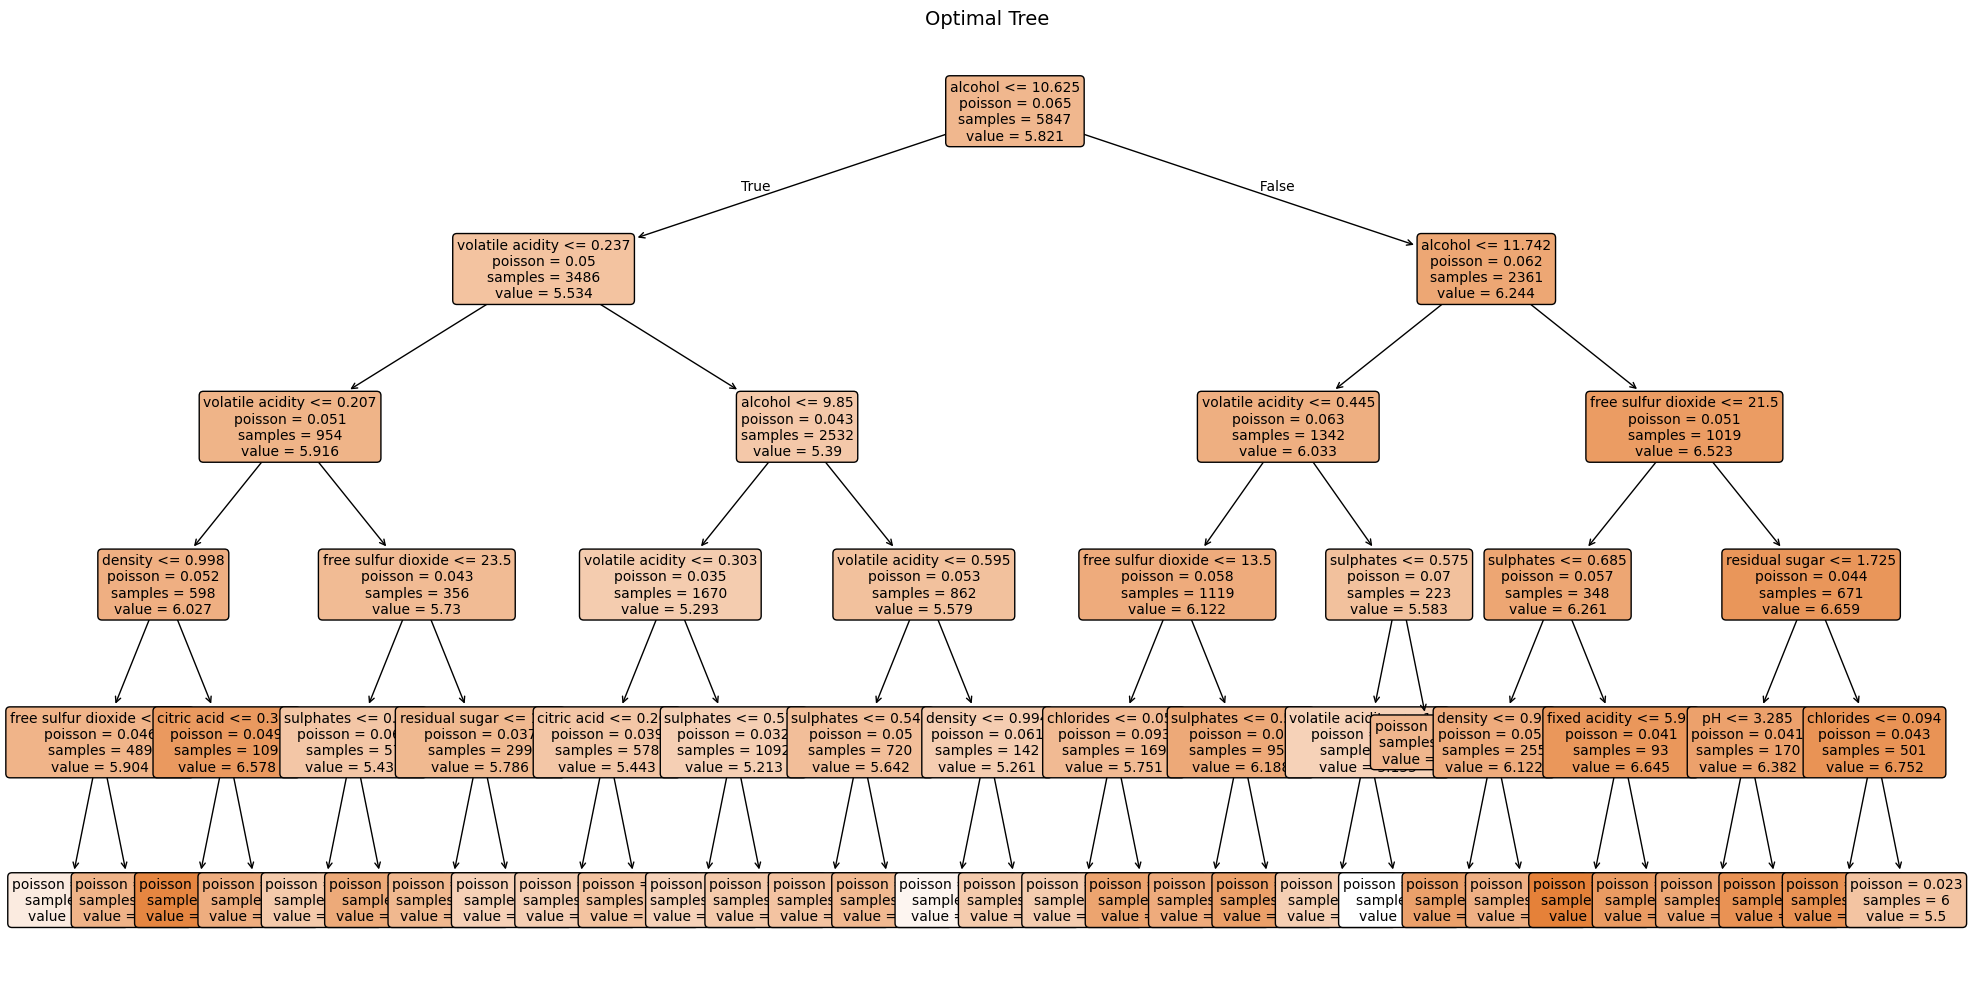

In [26]:
column_names = df_raw.drop(columns=['quality', 'sweetness']).columns.tolist()

plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    max_depth=5,
    feature_names=column_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Optimal Tree", fontsize=14)
plt.tight_layout()
plt.show()

Διαβάζοντας το δέντρο, μπορούμε να δούμε έως και το 4ο επίπεδο (που
είναι ευκρινές) ποιά split οδηγούν σε υψηλότερη ποιότητα. Συνοπτικά
έχουμε:

-   Στο φύλλο με ποιότητα 6.659 οδηγηθήκαμε επιλέγοντας υψηλό βαθμό
    αλκοόλ \> 10.625, διοξείδιο του θείου \< 21.5 και σάκχαρα \< 1.725

-   Στην αμέσως επόμενη ποιότητα, αλκοόλ και πάλι \> 10.625, ελεύθερο
    διοξείδιο του θείου ≤ 21.5 αλλά αυτή τη φορά θειικά άλατα \< 0.685

-   Στη χαμηλότερη ποιότητα φτάνω με πτητική οξύτητα \< 0.303 και
    αλκοολικούς βαθμούς \< 9.85.

Για να δω τη σημασία κάθε χαρακτηριστικού, υπάρχει η μέθοδος
`feature_importances_` για `DecisionTreeRegressor`. Παίρνω και τα
ονόματα των στηλών από το αρχικό df, επομένως:

In [27]:
column_names = df_raw.drop(columns=['quality', 'sweetness']).columns.tolist()
importance_values = best_model.feature_importances_.tolist()

df_feature_importance = pd.DataFrame({'Feature': column_names, 'Importance': importance_values})

print(df_feature_importance)

                 Feature  Importance
0          fixed acidity    0.002998
1       volatile acidity    0.189320
2            citric acid    0.023356
3         residual sugar    0.012925
4              chlorides    0.033446
5    free sulfur dioxide    0.045246
6   total sulfur dioxide    0.000000
7                density    0.042334
8                     pH    0.005789
9              sulphates    0.082707
10               alcohol    0.561878
11            type_white    0.000000


Το ραβδόγραμμα με τη σημαντικότητα κάθε χαρακτηριστικού, ταξινομώντας τα
με βάση τη σημαντικότητα τους είναι:

In [28]:
fig = px.bar(
    df_feature_importance,
    x='Importance',
    y='Feature',
    orientation='h',
    color_discrete_sequence=[color_palette[0]],
    title='Σημαντικότητα χαρακτηριστικών',
    labels={'Importance': 'Importance', 'Feature': 'Feature'}
)

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
)

fig.show()

Από το ραβδόγραμμα επιβεβαιώνεται η βαρύτητα των αλκοολικών βαθμών
(0.56), που είδαμε και ως κύριο διαχωριστικό στην ποιότητα των κρασιών,
ακολουθούμενο από την πτητική οξύτητα (0.19) και τις θειϊκές ενώσεις
(0.08).